<a href="https://colab.research.google.com/github/BrajanNieto/stats-prob-py/blob/main/02.ProyectoEstadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Maestría de Ciencia de Datos e Inteligencia Artificial
### Estadística y Probabilidades


**Autores:**  

Rodrigo Guedes del Pozo

Sebastian Lopez Medina

Brajan Esteban Nieto Espinoza  

Mateo Tapia



<img src="https://pregrado.utec.edu.pe/sites/default/files/logo-utec-h_0_0.svg" width="190" alt="Logo UTEC" loading="lazy" typeof="foaf:Image">

# 1) Lectura de los datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('info_clientes_libres_proyecto.xlsx', sheet_name='INFO_CLIENTES')
df.rename(columns={
    'MARGEN_COMERCIAL (USD)': 'MARGEN_COMERCIAL',
    'ENERGÍA (MW.h)': 'ENERGIA_MWh',
    'POTENCIA_CONTRATADA (MW)': 'POTENCIA_MW'
}, inplace=True)

df.head()

,RUC CLIENTE,CLIENTE / CENTRAL GENERACIÓN,MARGEN_COMERCIAL,ENERGIA_MWh,POTENCIA_MW
0,20100147514,SOUTHERN PERU CC,3171115.77,197393.80,200.0
1,20330262428,MINERA ANTAMINA,2666303.39,86785.25,340.0
2,20261677955,NEXA RESOURCES CAJAMARQUILLA S.A.,995941.29,120093.62,120.0
3,20137913250,ANGLO AMERICAN QUELLAVECO S.A.,766555.89,104078.09,187.4
4,20538428524,MINERA LAS BAMBAS S.A.,697948.78,105836.22,100.0


# 2) Análisis estadístico descriptivo y visual

In [4]:
numeric_cols = ['MARGEN_COMERCIAL', 'ENERGIA_MWh', 'POTENCIA_MW']
# Resumen estadístico
estadisticas = df[numeric_cols].describe()
print("Estadísticas descriptivas:")
print(estadisticas)


Estadísticas descriptivas:
       MARGEN_COMERCIAL    ENERGIA_MWh  POTENCIA_MW
count      1.187000e+03    1187.000000  1187.000000
mean       1.632432e+04    2184.872291     5.506039
std        1.376658e+05   13574.391144    24.111949
min       -6.507613e+05       0.160000     0.010000
25%        4.311400e+02      70.850000     0.160000
50%        9.674000e+02     141.860000     0.460000
75%        2.894540e+03     463.225000     1.685000
max        3.171116e+06  305494.000000   540.000000


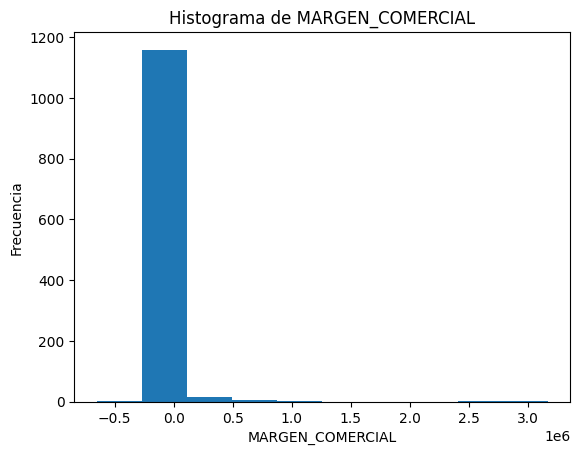

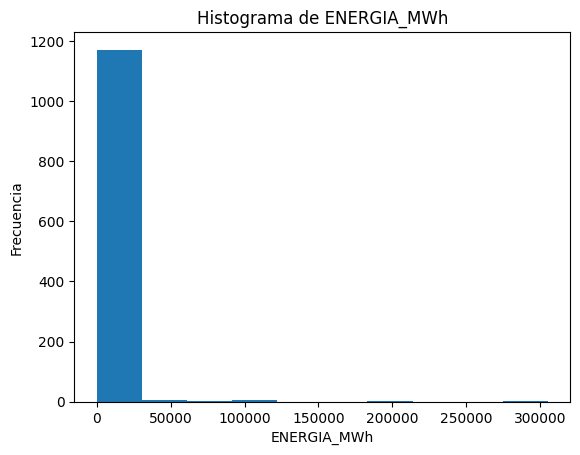

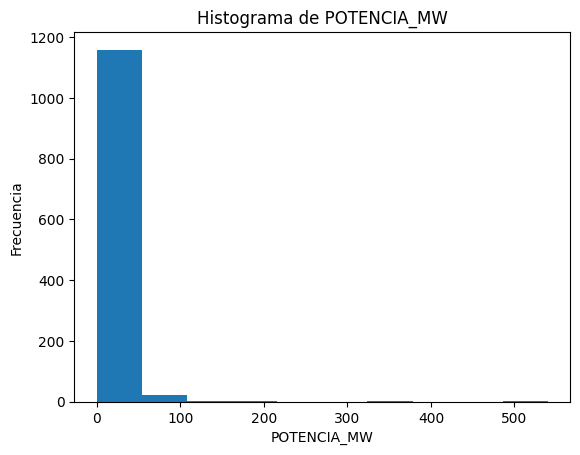

In [5]:
for col in numeric_cols:
    plt.figure()  # para asegurar que cada gráfico sea independiente
    plt.hist(df[col].dropna(), bins=10)  # ajusta 'bins' según prefieras
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.title(f'Histograma de {col}')
    plt.show()


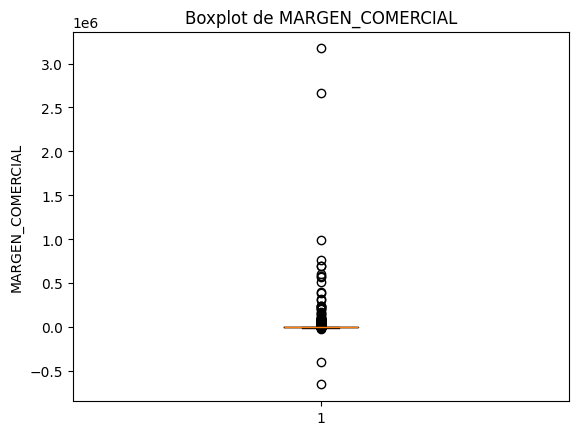

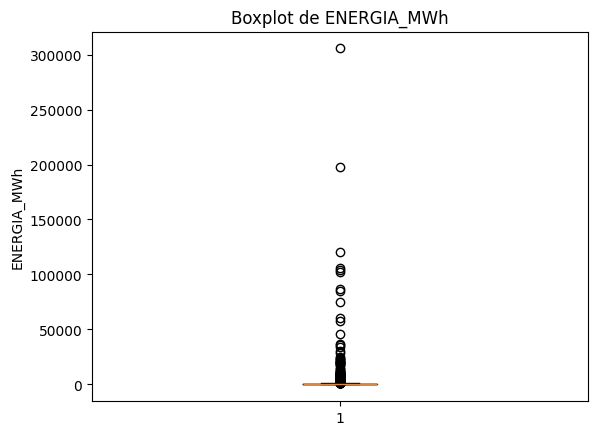

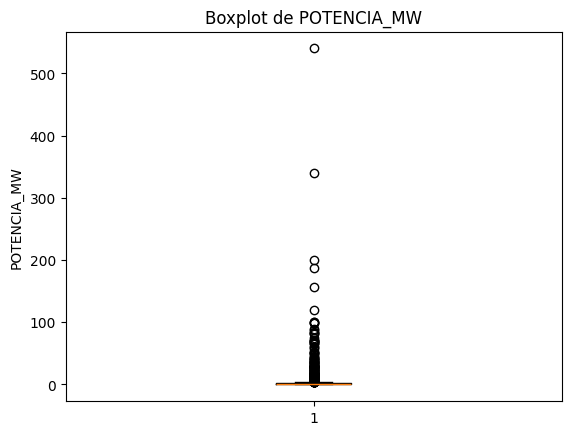

In [6]:
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)
    plt.show()


Matriz de correlación (numérica):
                  MARGEN_COMERCIAL  ENERGIA_MWh  POTENCIA_MW
MARGEN_COMERCIAL          1.000000     0.543785     0.477412
ENERGIA_MWh               0.543785     1.000000     0.871618
POTENCIA_MW               0.477412     0.871618     1.000000


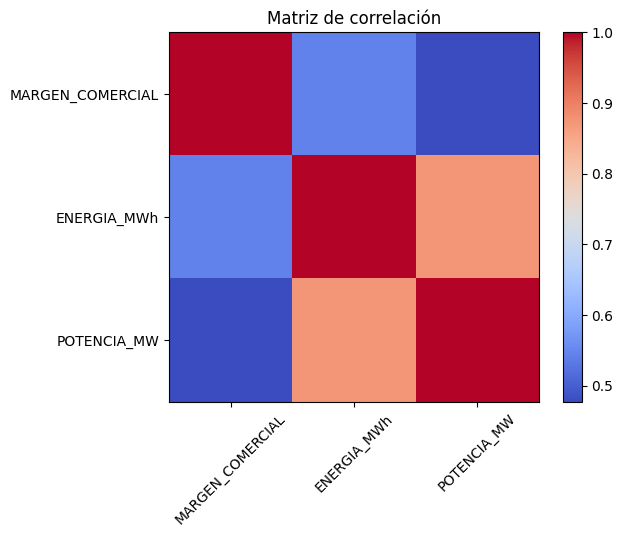

In [7]:
import numpy as np

corr_matrix = df[numeric_cols].corr(method='pearson')
print("Matriz de correlación (numérica):")
print(corr_matrix)

# Heatmap (muy básico con plt.imshow)
plt.figure()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.colorbar()
plt.title('Matriz de correlación')
plt.show()


# 3) Definición de Heuristicas y Parametros

In [8]:
# Convertimos los datos a listas
margen = df['MARGEN_COMERCIAL'].tolist()
potencia = df['POTENCIA_MW'].tolist()
clientes = df['RUC CLIENTE'].tolist()
CAPACIDAD = 50000  # MW máximo


In [ ]:
def brute_force_knapsack(margen, potencia, capacidad):
    """
    Algoritmo de fuerza bruta para el problema Knapsack.

    Parámetros:
      margen    : lista de márgenes comerciales de cada cliente.
      potencia  : lista de potencias (peso) de cada cliente (deben ser enteros).
      capacidad : capacidad máxima permitida (por ejemplo, 500 MW).

    Retorna:
      best_value  : el máximo margen comercial alcanzable.
      best_subset : lista de índices de clientes que conforman la solución óptima.
    """
    n = len(margen)
    best_value = 0
    best_subset = []

    # Se recorren todas las combinaciones posibles: desde 0 hasta 2^n - 1
    for subset in range(2**n):
        total_potencia = 0
        total_margen = 0
        current_subset = []

        # Para cada cliente, determinar si está incluido en la combinación actual
        for i in range(n):
            # Si el bit i-ésimo está encendido en 'subset', incluimos el cliente i
            if subset & (1 << i):
                total_potencia += potencia[i]
                total_margen += margen[i]
                current_subset.append(i)

        # Si la combinación cumple la restricción y tiene un margen mayor que el mejor encontrado
        if total_potencia <= capacidad and total_margen > best_value:
            best_value = total_margen
            best_subset = current_subset.copy()

    return best_value, best_subset

# Ejemplo de uso:


max_margen, seleccionados = brute_force_knapsack(margen, potencia, CAPACIDAD)
print(f"Máximo Margen Comercial: {max_margen}")
print("Clientes seleccionados (índices):", seleccionados)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Funciones auxiliares (fitness, repair, etc.) -----------------------
def fitness(solution, margen, potencia, capacidad=500):
    """
    Calcula el fitness de una solución binaria.
    Devuelve (margen_total, potencia_total). Si excede capacidad, fitness=0.
    """
    solution = np.array(solution)
    margen = np.array(margen)
    potencia = np.array(potencia)

    potencia_total = np.sum(solution * potencia)
    margen_total = np.sum(solution * margen)

    if potencia_total <= capacidad:
        return margen_total, potencia_total
    else:
        return 0, potencia_total

def repair_solution(solution, margen, potencia, capacidad=500):
    """
    Repara una solución que excede la capacidad eliminando clientes
    de menor ratio (margen/potencia) hasta que no exceda.
    """
    solution = np.array(solution).copy()
    margen = np.array(margen)
    potencia = np.array(potencia)

    potencia_total = np.sum(solution * potencia)
    if potencia_total <= capacidad:
        return solution

    # Calculamos ratio solo para los que están seleccionados
    ratio = np.zeros_like(margen, dtype=float)
    for i in range(len(solution)):
        if solution[i] == 1:
            ratio[i] = margen[i] / potencia[i]
        else:
            ratio[i] = float('inf')  # no seleccionados

    while potencia_total > capacidad:
        idx = np.argmin(ratio)  # menor ratio
        solution[idx] = 0
        ratio[idx] = float('inf')
        potencia_total = np.sum(solution * potencia)

    return solution


In [ ]:
# -------------------- PSO -------------------------------------------
def run_pso(margen, potencia,
            n_particles=50, n_iterations=100,
            w=0.7, c1=1.5, c2=1.5, capacidad=500):
    """
    Corre UNA VEZ PSO binario. Devuelve:
      - global_best_position (mejor vector binario)
      - global_best_fitness (fitness de esa mejor solución)
      - global_best_potencia (potencia total de esa mejor solución)
    """
    dim = len(margen)

    # Inicializar población
    positions = np.random.randint(0, 2, size=(n_particles, dim))
    velocities = np.random.uniform(-1, 1, size=(n_particles, dim))

    # Inicializar mejores personales
    personal_best_positions = positions.copy()
    personal_best_fitness = np.zeros(n_particles)
    personal_best_potencia = np.zeros(n_particles)

    # Evaluar fitness inicial + reparar
    for i in range(n_particles):
        positions[i] = repair_solution(positions[i], margen, potencia, capacidad)
        fit_i, pot_i = fitness(positions[i], margen, potencia, capacidad)
        personal_best_fitness[i] = fit_i
        personal_best_potencia[i] = pot_i

    # Global best
    global_best_idx = np.argmax(personal_best_fitness)
    global_best_position = personal_best_positions[global_best_idx].copy()
    global_best_fitness = personal_best_fitness[global_best_idx]
    global_best_potencia = personal_best_potencia[global_best_idx]

    # Iteraciones
    for t in range(n_iterations):
        for i in range(n_particles):
            r1, r2 = np.random.random(2)
            # Actualización de velocidad
            velocities[i] = (w * velocities[i]
                             + c1 * r1 * (personal_best_positions[i] - positions[i])
                             + c2 * r2 * (global_best_position - positions[i]))

            # Binario con sigmoide
            sigmoid = 1 / (1 + np.exp(-velocities[i]))
            positions[i] = (np.random.random(dim) < sigmoid).astype(int)

            # Reparar y evaluar
            positions[i] = repair_solution(positions[i], margen, potencia, capacidad)
            fit_i, pot_i = fitness(positions[i], margen, potencia, capacidad)

            # Actualizar mejor personal
            if fit_i > personal_best_fitness[i]:
                personal_best_positions[i] = positions[i].copy()
                personal_best_fitness[i] = fit_i
                personal_best_potencia[i] = pot_i

                # Actualizar mejor global
                if fit_i > global_best_fitness:
                    global_best_position = positions[i].copy()
                    global_best_fitness = fit_i
                    global_best_potencia = pot_i

    # Retornar solo la mejor solución final
    return global_best_position, global_best_fitness, global_best_potencia

In [ ]:
def hamming_distance(x, y):
    return np.sum(x != y)

def run_firefly(margen, potencia,
                n_fireflies=50, n_iterations=100,
                alpha=0.2, beta0=1.0, gamma=1.0, capacidad=500):
    """
    Corre UNA VEZ Firefly binario. Devuelve:
      - best_solution (vector binario)
      - best_fitness
      - best_potencia
    """
    dim = len(margen)
    fireflies = np.random.randint(0, 2, size=(n_fireflies, dim))

    fitness_values = np.zeros(n_fireflies)
    potencia_values = np.zeros(n_fireflies)

    # Evaluación inicial
    for i in range(n_fireflies):
        fireflies[i] = repair_solution(fireflies[i], margen, potencia, capacidad)
        fit_i, pot_i = fitness(fireflies[i], margen, potencia, capacidad)
        fitness_values[i] = fit_i
        potencia_values[i] = pot_i

    best_idx = np.argmax(fitness_values)
    best_solution = fireflies[best_idx].copy()
    best_fitness = fitness_values[best_idx]
    best_potencia = potencia_values[best_idx]

    # Iteraciones
    for t in range(n_iterations):
        for i in range(n_fireflies):
            for j in range(n_fireflies):
                if fitness_values[j] > fitness_values[i]:
                    r = hamming_distance(fireflies[i], fireflies[j])
                    beta = beta0 * np.exp(-gamma * r)

                    for d in range(dim):
                        if np.random.random() < beta:
                            # Copia bit de j
                            fireflies[i][d] = fireflies[j][d]
                        else:
                            # Con prob alpha, muta
                            if np.random.random() < alpha:
                                fireflies[i][d] = 1 - fireflies[i][d]

            # Reparar y reevaluar
            fireflies[i] = repair_solution(fireflies[i], margen, potencia, capacidad)
            fit_i, pot_i = fitness(fireflies[i], margen, potencia, capacidad)
            fitness_values[i] = fit_i
            potencia_values[i] = pot_i

            if fit_i > best_fitness:
                best_solution = fireflies[i].copy()
                best_fitness = fit_i
                best_potencia = pot_i

    return best_solution, best_fitness, best_potencia

# 3) Prueba de Hipotesis


--- Resultados de las 50 Corridas ---
   Corrida  PSO_Fitness  PSO_Potencia  Firefly_Fitness  Firefly_Potencia
0        1  2134.626877    498.872801      2015.574606        498.038481
1        2  2152.600102    493.046126      2051.069983        495.020488
2        3  2131.563734    494.352258      2008.243192        484.449176
3        4  2152.606303    498.452393      2027.822746        492.452890
4        5  2166.808184    493.289505      2030.824715        493.646440
5        6  2180.625112    499.749168      2002.697497        483.071560
6        7  2191.502635    499.200731      1976.811698        492.620892
7        8  2158.618201    499.189970      2048.989958        492.261555
8        9  2145.444906    496.576418      2050.783969        499.104814
9       10  2170.280638    497.809275      2032.648348        491.850866
Resultados guardados en 'resultados_50_corridas.csv'

Resumen estadístico:
        Corrida  PSO_Fitness  PSO_Potencia  Firefly_Fitness  Firefly_Potencia
count

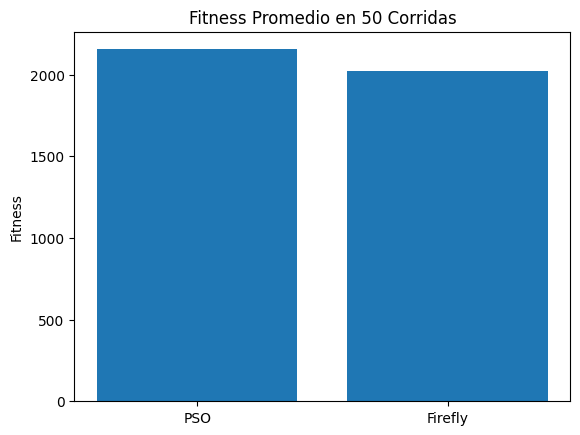

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# ------------------ main para 50 corridas independientes -----------
def main():
    n_clientes = 100
    margen = np.random.uniform(10, 100, n_clientes)
    potencia = np.random.uniform(5, 50, n_clientes)
    clientes = [f"Cliente_{i}" for i in range(n_clientes)]

    CAPACIDAD = 500
    n_runs = 50  # Numero de corridas independientes

    # Listas para almacenar resultados de cada corrida
    pso_fitness_list = []
    pso_potencia_list = []

    firefly_fitness_list = []
    firefly_potencia_list = []

    # Ahora hacemos 50 corridas independientes de cada heurística
    for run_id in range(n_runs):
        # ---- PSO ----
        best_pos_pso, best_fit_pso, best_pot_pso = run_pso(
            margen, potencia,
            n_particles=50,
            n_iterations=100,
            w=0.7, c1=1.5, c2=1.5,
            capacidad=CAPACIDAD
        )

        # ---- Firefly  ----
        best_sol_ff, best_fit_ff, best_pot_ff = run_firefly(
            margen, potencia,
            n_fireflies=50,
            n_iterations=100,
            alpha=0.2, beta0=1.0, gamma=1.0,
            capacidad=CAPACIDAD
        )

        # Guardamos el mejor de cada corrida
        pso_fitness_list.append(best_fit_pso)
        pso_potencia_list.append(best_pot_pso)

        firefly_fitness_list.append(best_fit_ff)
        firefly_potencia_list.append(best_pot_ff)

    # Construimos el DataFrame comparativo
    resultados_df = pd.DataFrame({
        'Corrida': range(1, n_runs+1),
        'PSO_Fitness': pso_fitness_list,
        'PSO_Potencia': pso_potencia_list,
        'Firefly_Fitness': firefly_fitness_list,
        'Firefly_Potencia': firefly_potencia_list
    })

    print("\n--- Resultados de las 50 Corridas ---")
    print(resultados_df.head(10))  # primeros 10

    # Guardar CSV
    resultados_df.to_csv('resultados_50_corridas.csv', index=False)
    print("Resultados guardados en 'resultados_50_corridas.csv'")

    # Puedes hacer comparaciones estadísticas, promedios, etc.
    print("\nResumen estadístico:")
    print(resultados_df.describe())

    # Ejemplo de graficar en barras el mejor fitness promedio de cada método
    plt.figure()
    avg_pso = resultados_df['PSO_Fitness'].mean()
    avg_ff = resultados_df['Firefly_Fitness'].mean()
    plt.bar(['PSO', 'Firefly'], [avg_pso, avg_ff])
    plt.title("Fitness Promedio en 50 Corridas")
    plt.ylabel("Fitness")
    plt.show()

if __name__ == "__main__":
    main()


In [13]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 1. Leer el archivo CSV
df = pd.read_csv('resultados_50_corridas.csv')
print("Primeros 5 registros del DataFrame:")
print(df.head())

# 2. Estadísticos descriptivos para PSO_Fitness y Firefly_Fitness
pso_fitness = df['PSO_Fitness']
firefly_fitness = df['Firefly_Fitness']

print("\nEstadísticos descriptivos para PSO_Fitness:")
print(pso_fitness.describe())

print("\nEstadísticos descriptivos para Firefly_Fitness:")
print(firefly_fitness.describe())

# 3. Calcular la diferencia entre PSO y Firefly para cada corrida
# Definimos: d = PSO_Fitness - Firefly_Fitness
diferencias = pso_fitness - firefly_fitness

print("\nEstadísticos descriptivos para la diferencia (PSO - Firefly):")
print(diferencias.describe())

# 4. Realizar la prueba de hipótesis pareada (t-test para muestras relacionadas)
# Hipótesis:
# H₀: μ_d ≤ 0  (PSO no es mejor que Firefly)
# H₁: μ_d > 0  (PSO es mejor que Firefly)
# Donde d = PSO_Fitness - Firefly_Fitness
t_stat, p_value_two = stats.ttest_rel(pso_fitness, firefly_fitness)

# Convertir el p-value a una prueba unidireccional (cola derecha).
if t_stat > 0:
    p_value_one = p_value_two / 2
else:
    p_value_one = 1 - p_value_two / 2

print("\nResultado de la prueba t-pareada:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value (unilateral, cola derecha): {p_value_one:.4f}")

# 5. Conclusión basada en el nivel de significancia (alpha = 0.05)
alpha = 0.05

if p_value_one < alpha:
    print("\nConclusión: Se rechaza la hipótesis nula.")
    print("Los datos indican que PSO es significativamente mejor que Firefly (mayor fitness).")
else:
    print("\nConclusión: No se rechaza la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que PSO es significativamente mejor que Firefly.")

Primeros 5 registros del DataFrame:
   Corrida  PSO_Fitness  PSO_Potencia  Firefly_Fitness  Firefly_Potencia
0        1  2134.626877    498.872801      2015.574606        498.038481
1        2  2152.600102    493.046126      2051.069983        495.020488
2        3  2131.563734    494.352258      2008.243192        484.449176
3        4  2152.606303    498.452393      2027.822746        492.452890
4        5  2166.808184    493.289505      2030.824715        493.646440

Estadísticos descriptivos para PSO_Fitness:
count      50.000000
mean     2154.966427
std        16.888118
min      2119.573450
25%      2145.551183
50%      2153.791152
75%      2166.808184
max      2194.030791
Name: PSO_Fitness, dtype: float64

Estadísticos descriptivos para Firefly_Fitness:
count      50.000000
mean     2023.371523
std        22.707268
min      1976.811698
25%      2005.085135
50%      2023.070644
75%      2038.162261
max      2096.502602
Name: Firefly_Fitness, dtype: float64

Estadísticos descriptiv